# Notebook for development of the script 

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
help(rd)

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.6/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)
               lognormal
               negative exponential
               gamma
             

In [3]:
# Genome generation
size_genome=10000

genome = ''.join(rd.choices(["A", "T", "G", "C"], k=size_genome))
genome

'GAAGAAGAGCGCTTTTTCAATTTTTGCACAACCACGCGTGAAAGTTTGACGGGAAAGATCCAGAATCCATCGCGCCGAACTTCTAGATAGTGCTATGATGAGATGCTTAGTTATTCGGGGGCCGGGATGTCGCGGGACCGTCATGGACTAGTACTAGTACATTCAGATACGGCCCCACCGCTCACTGTTTGTCACGACCCCTTCACCTCTTGCTTTGCAAACACCGTTCTAGTTGCGACACCTTAGTTGAGACCTCTGTATTTTCCACCCAGCTCAAATTTTATGTAGGCCTGGCAGAGGATCAATTATATGGGCGTCAGCCTCTCGAGTGGCTATGCTGGTCAGTTAAACAAGCGGCTAGTTAAAATATCATCGCGTGGAAGCCAAATATTGGACATCTACTTCACAGATTGAGAATTGATTTCTCCCCGTCCCTCTTCGCATAGTCAATTAGGGTAGCTCTTAGCCAGCTTACTTCTTCGCCCTCTGGTACTACATTACGGCCGATAAGTTTGGTGTGGTGCGACAGCGGTCTGTCGTAGCGGCCCGGCAAGCCTAGACCACGGCGGAGGGTAGACGGCTAAGATCGGCTTCGTGGCAGCGCTACCTAAAAAACGCGGCACGGCCGCACCGGTACACTTTCCACGTAGCTTGGAGGCCCTGTTAAGCCTTTTCCCAGGGGAAGGATAAGGCACGGAGATGCAGACCTTGGCTAGGCCGTGCATTTCGAGATACAGAACGTCATCCTCCCGGGAATGAGGGAACGTTTGAGGAGGCATCTTAAAGTTAGCACCTTGACTTTCTTAGATCAAGACATCGCAATACTACTAAAAGTGCGGGATATAAACCGCCGGCTAAGGAGAATTGAGTTGCCCCGGACTAGATATGATCCCGTTGCTCGCCCTCTAGCCCGCACATCCCTTCACGTTGTATCAGTGCGACGGACACCACCCCCCGGCAATTGTTGTGCAATGTTTTCTAAACGATACATGAAGCCAA

In [4]:
# Reads generation
size_reads=100
nb_reads=5000

list_reads=[]
for _ in range(nb_reads):
    start = rd.randint(0, size_genome-1)
    read = genome[start:min(start+100, size_genome)] + genome[0:max(start+100-size_genome, 0)]
    list_reads.append(read)
    
list_reads

['TATATGATAACATCTAAATACTGTTTGTTCATTGTAAAGTTCACAACCTCAGCGTGCGATGGATCAGCGAGCTCACCTTGAGGTGTTTTGAGAGACGCAT',
 'CTATGTAACTGAGAGAAAGTTTCGGGTATAAAGTTCTGAATCGTTATTGAGTGAGGCCAAGTCGTTCTCTCGAAGCCGCGCGTCATGTAACGTCATGAAC',
 'GATCATTGCGTTGAAGAGTGTAAGCTGAACCGTCGTTAGCTCGCTACAGCAATATACGCGCGTAGTGAGCGTATAATACTTCAGTCAAGGTAACCTCATT',
 'GTCATGCCGATCTTATAGATCAGTGGTCGCATCTGTAGCCCTACCGGGGCTATGGCGATACCGCAAAGGGACCATGCGAGGGCTCACTTCCTAGCCTGAA',
 'GCTAGCAGGTAAATGCCGGTTCTCCGAGCCGGGAATGGGCGCTACAAAGTTGGTGAGCACGTTTCATTTCAATAAGAGTTATCATTAGCTCCTATCAGAT',
 'AATATAAGGTCATGAGAGGCTCGGTTTGGGGTCTCGTGGTGACCCTAAGATAGGCACGACGCGAGCTTTTCACAGCCGAGGGGTCTCAAGTGGCAGTTCC',
 'TAGTAGTACTAACCAATGACGGAGCACAACAGACAGCCTGGCGTACTTACACCCTCAAGAAGCATGACCGCGCTTCCACTTTTCCGTAAATATAGACCCG',
 'TTCGTTTGGAGGACGGCCATTTTGTCGCGTCGTTCGTCTGGGTCTTGAACGAGTCGGTATATGATAACATCTAAATACTGTTTGTTCATTGTAAAGTTCA',
 'AAAAGTGTCTTCGTGAACTCGCCTTTGGCAGAGACGGGTTATAACAAGTTCTCAGGCGTGCGGAGATGTACAAAGCGGCTCGACTTTTCAGGGGGCTTAC',
 'ACACAGGATCTTAATCCCTCAATGTGAACATTCTGCGAGCTAGCAGGTAAATG

In [5]:
# K-mers generation
size_kmers=30

set_kmers=set()
for read in list_reads:
    for i in range(size_reads-size_kmers):
        set_kmers.add(read[i:i+size_kmers])

In [6]:
#test nb k-mers = taille genome (apres set) : coverage suffisant + pas de repetitions
len(set_kmers)

10000

In [7]:
# (K-1)-mers generation
ordset_km1=set()

for kmer in set_kmers:
    ordset_km1.add(kmer[1:])    # suffixe
    ordset_km1.add(kmer[:-1])   # prefix
ordset_km1 = list(ordset_km1)
    
nb_km1=len(ordset_km1)
print(nb_km1)
# s'il y a autant de k-1mers que de k-mers, alors il n'y a q'un seul cycle dans le graphe (cas idéal)

10000


In [62]:
# Graph generation
# prefix on rows
# suffix on columns
graph=np.zeros((nb_km1, nb_km1))

for kmer in set_kmers:
    i = ordset_km1.index(kmer[:-1]) #prefix
    j = ordset_km1.index(kmer[1:])  #suffix
    graph[i, j]+=1
    

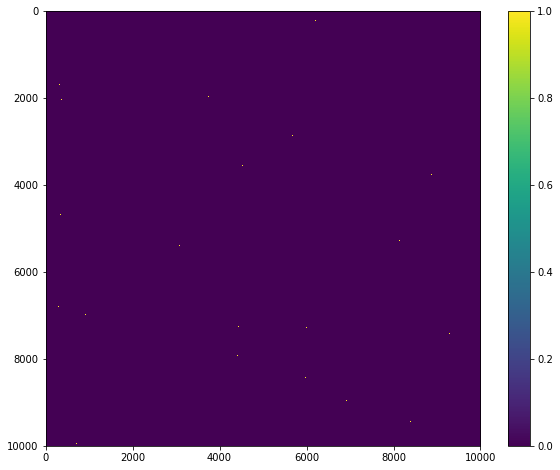

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.imshow(graph) 
plt.colorbar()

In [ ]:
# Si set k-mers, on a que des & dans le graph
# La diagonale peut etre non nulle si un k-mer est composé de la meme lettre. ex GGGG

In [20]:
# Test graph Eulerien
success=True
for i in range(nb_km1):
    if graph[i,:].sum() != graph[:,i].sum():
        print("PROBLEM : Ce graphe n'est pas Eulerien !!")
        success=False
        break
if success:    
    print("SUCCESS !! Ce graphe est Eulerien !!")


SUCCESS !! Ce graphe est Eulerien !!


In [ ]:
# Parcours du graphe
    




In [63]:
# Reconstitution pour un graph eulerien a 1 cycle
sequence= ordset_km1[0] #sequence pour reconstitution du genome. 
                        #Init au premier (k-1)-mer
i=0        #index prefix
j=0        #index suffix
i_stop=-1  #condition pour tester le retour au premier (k-1)-mer (fin du cycle)


while i_stop!=0:
    if graph[i, j]==0:               # Si il n'y a pas de lien entre prefix et suffix
        j+=1
    elif graph[i, j]==1:             # Si il y a un lien entre prefix et suffix
        sequence+= ordset_km1[j][-1]    # ajoute le dernier nucleotide du suffixe a la sequence
        graph[i, j]-=1                  # supprime le lien du graphe
        i=j                             # le suffix devient le nouveau prefix
        i_stop=i                        # actualisation de la condition d'arret
        j=0                             # reinitialisation de l'index du suffix
        
print(sequence)


GTTATGAATCATCATCGGGTGGCCTTGAG
GTTATGAATCATCATCGGGTGGCCTTGAGTATGAGCGTCGAGACGATGCGCTGTGTACAATAAAGTACTGCAGAACGCTGCATCTGGAAGTTCGCGTTAAACCCGTGGATGTCATTGATGCATGTCGTGTAACTCCCCCAAGGTTATGTAAAACCAATAAGGGCGGACGTGAAACCGCGTTGGATTATGTTCTGTTTATTCTGGACAGCCTTGTAGCTCGGCTGGCCTAGGCTCCATTCGCTCAGAGCGGTTTCGTCTGCTTCTACTTAAAAACGTAAAACATTCATATACCCGATCCGAGACCTGGTCACTACTACCCGACGCTGACGAGGGTGGTATAGGAAACCACGAAACGACCCGCCCGGCATCCGTTTCCGTAGGCCCTTCGATGAGCAGTTACCGATTGATAAAGATATAAGATTCACTGGATCTCTCCTTCTTATTCGAGGTGGTCATCACAAGATGAGTTGGTAATCCTTAACAGATGATGGGTGCGCAGTAAAATACGTTGCCCTTAATGAGCGTTCGTCAAGTGTCTAGCCGTACCGAAGACTCCTTCCAAATGGCGTACAAAAGTGTCTTCGTGAACTCGCCTTTGGCAGAGACGGGTTATAACAAGTTCTCAGGCGTGCGGAGATGTACAAAGCGGCTCGACTTTTCAGGGGGCTTACGGATCAGATTCTCACTCCGCGCACATGAGCGTAAGTTTATGTATTAGGGTGCGCATGAGGAGACATTAGGGCTGCTTCTGTCATTGGCCAGTCTCTAGGCCCCACCGCATTAAGCACTAATTGTTGTCGAAGTCTCTTCCTCGTTCTCGGGACCATCGGTTGGTGGCATCCAGAAGCAGTCGACCCCAATGCGTTTTAGGCATTTTCTCATTAGGTCAGAGAGCCCGAAACCGGGCGCAGTAGACCATACTAGGGGTGACTACTCAATACGTCCGAAACGCCCCTTTGCCAGTCCGCAC

In [50]:
sequence.index(genome[:40])

4512

In [57]:
seq2=sequence[:10000]

In [54]:
genome[:40]

'GAAGAAGAGCGCTTTTTCAATTTTTGCACAACCACGCGTG'

In [58]:
seq3=seq2[4512:]+seq2[:4512]

In [60]:
seq3==genome

True

In [133]:
OrderedSet

NameError: name 'OrderedSet' is not defined

In [69]:
# Prefix & Suffix generation
list_prefix=[]
list_suffix=[]
while len(set_kmers) > 0:
    kmer=set_kmers.pop()
    list_prefix.append(kmer[:-1])
    list_suffix.append(kmer[1:])
print(len(list_prefix))
print(len(list_suffix))

10000
10000


In [86]:
#Graph generation (matrice d'adjacence)
#rows : prefix index
#cols : suffix index
graph=np.zeros((len(list_prefix), len(list_suffix)))

for p, prefix in enumerate(list_prefix):
    for s, suffix in enumerate(list_suffix):
        if prefix==suffix:
            graph[p, s]+=1

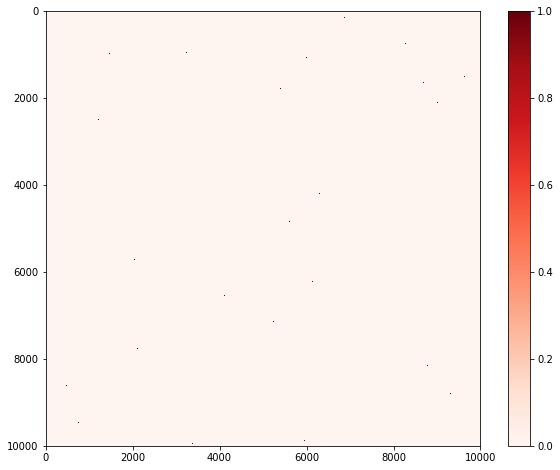

In [120]:
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.imshow(graph, cmap='Reds')
plt.colorbar()